# <center> **DIGIT CLASSIFICATION USING DEEP LEARNING WITH MNIST DATASET** </center>

###Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Importing Dataset

In [ ]:
datasets = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = datasets.load_data()

### Visualizing the Data

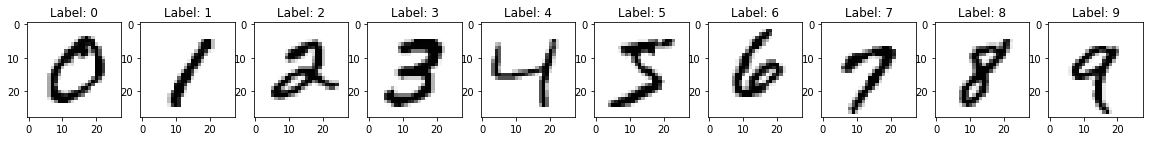

In [ ]:
classes = list(set(y_train))

f, ax = plt.subplots(1, len(classes), figsize=(20, 20))

for label in classes:
  image = x_train[y_train == label][0]
  ax[label].imshow(image, cmap=plt.cm.binary)
  ax[label].set_title("Label: {}".format(label));

plt.show()

### Normalizing The Data

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

(10000, 28, 28)

###Training The Network

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(len(classes), activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3500 - accuracy: 0.8931
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0820 - accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0505 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0378 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0275 - accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0168 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0144 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

### Evaluating the Model

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("Loss: {}, Accuracy: {}".format(val_loss, val_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0806 - accuracy: 0.9747
Loss: 0.08059008419513702, Accuracy: 0.9746999740600586


In [ ]:
predictions = model.predict(x_test)

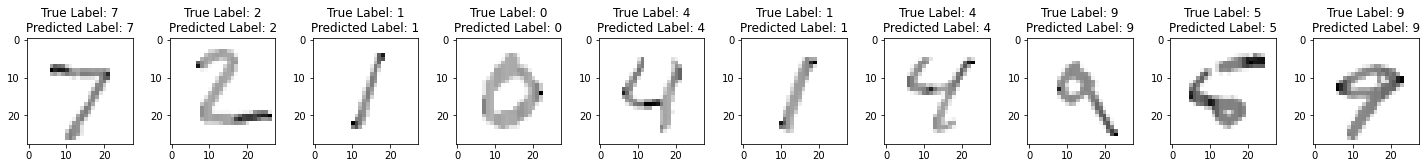

In [ ]:
max_predictions = 10

f, ax = plt.subplots(1, max_predictions, figsize=(20,20))

for index in range(max_predictions):
  ax[index].imshow(x_test[index], cmap=plt.cm.binary)
  ax[index].set_title("True Label: {}\nPredicted Label: {}".format(y_test[index], np.argmax(predictions[index])));

plt.tight_layout()
plt.show()

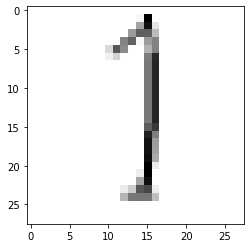

In [ ]:
import cv2

test_image = cv2.imread('one.jpg')
test_resized = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_resized = cv2.resize(test_resized, (28, 28), interpolation=cv2.INTER_AREA)

prepared_image = tf.keras.utils.normalize(test_resized, axis=1)
prepared_image = np.array(prepared_image).reshape(1, 28, 28)
predicted_output = model.predict(prepared_image)
# np.argmax(predicted_output)
# plt.imshow(prepared_image, cmap=plt.cm.binary)